<a href="https://colab.research.google.com/github/mazoSant/Personal_proyects/blob/master/proyecto_gastos_medicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos e importar librerias que podamos usar



In [30]:
!pip install numpy pandas seaborn matplotlib empiricaldist statsmodels sklearn pyjanitor
!pip install regressors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12401 sha256=9a79b44f5fb8af23f085e832ba90c9286b90598e4de1a0db8639093bbeac9985
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


In [3]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

from google.colab import drive 
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
'Copia de reto2_modelos_ml.ipynb'
'Copia de SANTIAGO MAZO GAVIRIA - Session5_class.ipynb'
 coronavirus.ipynb
 correlacion_negativa.ipynb
 curso_analisis_exploratorio.ipynb
 curso_estadistica_inferencial.ipynb
 curso_fundamentos_algebra_lineal.ipynb
 curso_matplotlib_seaborn.ipynb
'Curso platzi'
 Curso_python_3
 datatypes.ipynb
 db
 diabetes.ipynb
 distribucion_normal.ipynb
 estadistica.ipynb
' frequentistvsbayesian school.ipynb'
 graficando.ipynb
 indicadores_economicos.ipynb
 insurance.csv
 introML.ipynb
 london_example.ipynb
 manejoarchivos.ipynb
 manejo_dataframe.ipynb
 micro_1.ipynb
 Otros
 plots_simples.ipynb
 PostgresSQL.ipynb
 primera_regresion_lineal_template_42c71d99-6fdb-4af7-98f2-e3f8e2e76b7a.ipynb
 proyecto_gastos_medicos.ipynb
 regresion_lineal.ipynb
 Trabajo1_EstructurasCondicionalesRepetitivas.ipynb
 Untitled0.ipynb
 Untitled1.ipynb


In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

In [5]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Realizamos el análisis exploratorio de datos

In [6]:
df.shape

(1338, 7)

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


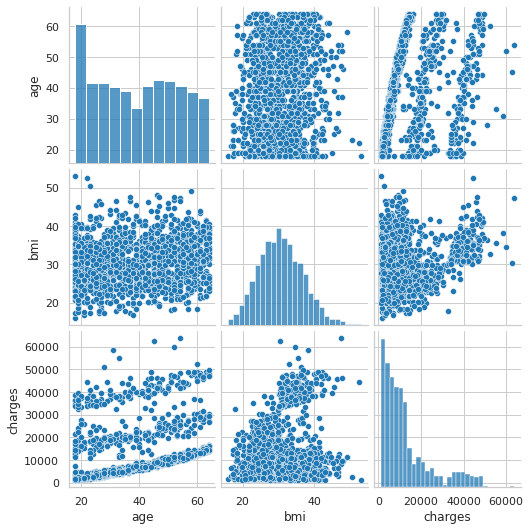

In [9]:
sns.pairplot(data=df[["age","bmi","charges"]])

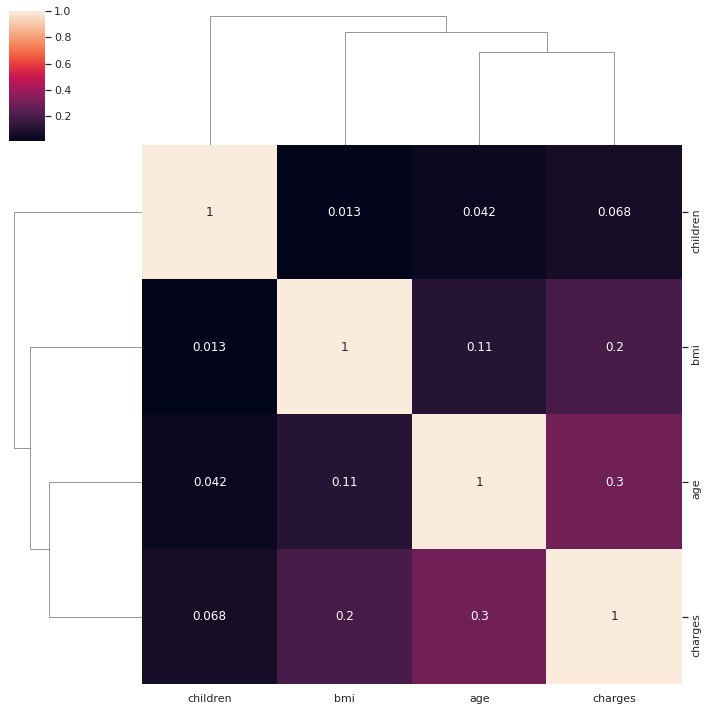

In [10]:
sns.clustermap(data=df[["age","bmi","charges","children"]].corr(),cbar=True,annot=True)

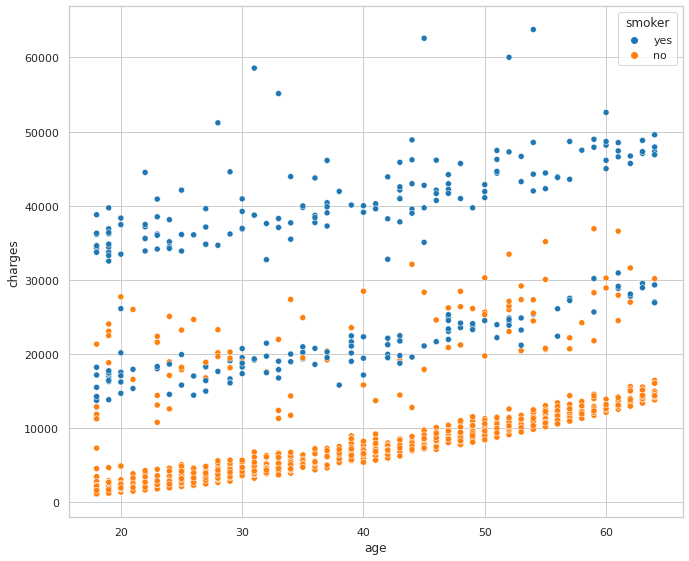

In [11]:
sns.scatterplot(data=df,x="age",y="charges",hue="smoker")

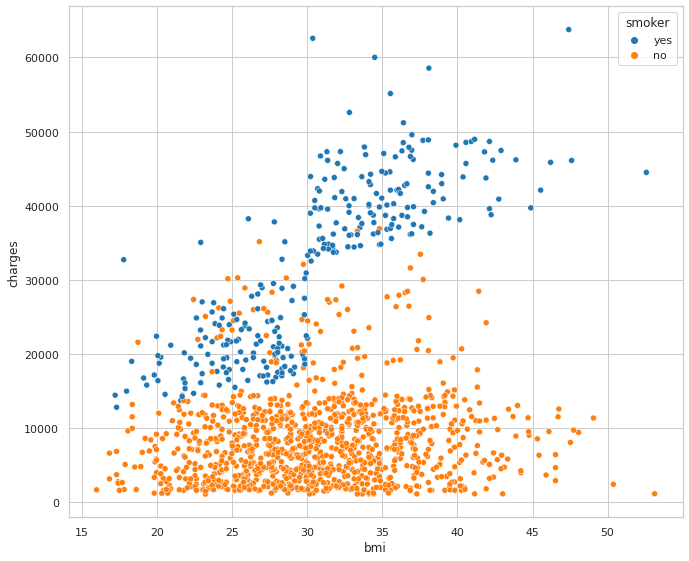

In [12]:
sns.scatterplot(data=df,x="bmi",y="charges",hue="smoker")

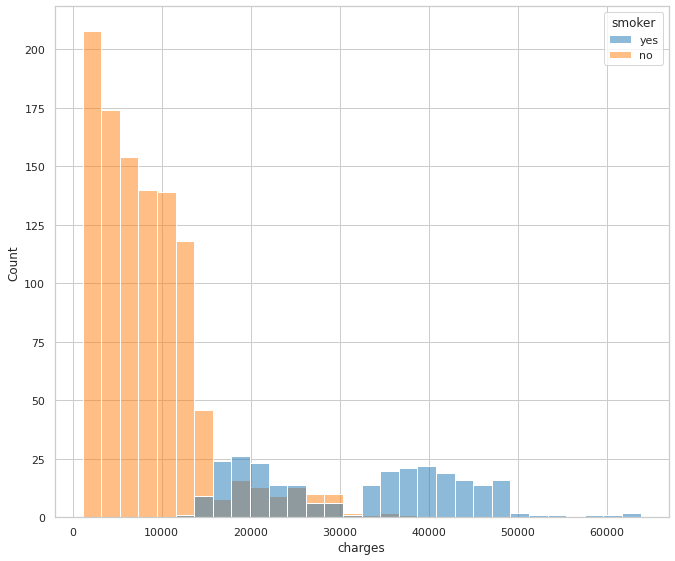

In [13]:
sns.histplot(data=df,x="charges",hue="smoker")

# Cambiamos variables categóricas por variables numéricas 

In [14]:
regiones=df["region"].unique()
regiones

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
df.smoker.replace(["yes","no"],["1","0"],inplace=True)
df.sex.replace(["male","female"],["1","0"],inplace=True)
df.region.replace(regiones,["0","1","2","3"],inplace=True)

In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Casteamos las variables para que pasen a ser tipo float

In [17]:
df['smoker']=df['smoker'].astype("float")
df['sex']=df['sex'].astype("float")
df['region']=df['region'].astype("float")

In [18]:
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

# Creando modelos

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [20]:
print(set(df.columns))

{'charges', 'children', 'bmi', 'region', 'smoker', 'age', 'sex'}


In [56]:
X_cols=list(set(df.columns)-set(["charges"]))
Y_cols=["charges"]

X=df[X_cols].values
Y=df[Y_cols].values

x_train,x_test,y_train,y_test= train_test_split(X,Y)
sc_x=StandardScaler().fit(X)
sc_y=StandardScaler().fit(Y)

X_train=sc_x.transform(x_train)
X_test=sc_x.transform(x_test)

Y_train=sc_y.transform(y_train)
Y_test=sc_y.transform(y_test)

model= LinearRegression()
model.fit(X_train,Y_train)

y_pred=model.predict(X_test)

In [60]:
X_train.shape

(1003, 6)

# Analizamos visualmente el rendimiento del modelo


In [45]:
df_pred=pd.DataFrame(y_pred,columns=["predicho"])
df_test=pd.DataFrame(Y_test,columns=["valores_reales"])
df_test

,valores_reales
0,-0.799328
1,0.457175
2,-0.551561
3,-0.872298
4,-0.706366
...,...
330,-0.203510
331,-0.828714
332,-0.854436
333,0.693034


In [46]:
model_results=pd.concat([df_pred,df_test],axis=1)

In [47]:
model_results

,predicho,valores_reales
0,-0.932380,-0.799328
1,-0.575295,0.457175
2,-0.511033,-0.551561
3,-0.975101,-0.872298
4,-0.779563,-0.706366
...,...,...
330,-0.047736,-0.203510
331,-0.414454,-0.828714
332,-0.264090,-0.854436
333,1.527918,0.693034


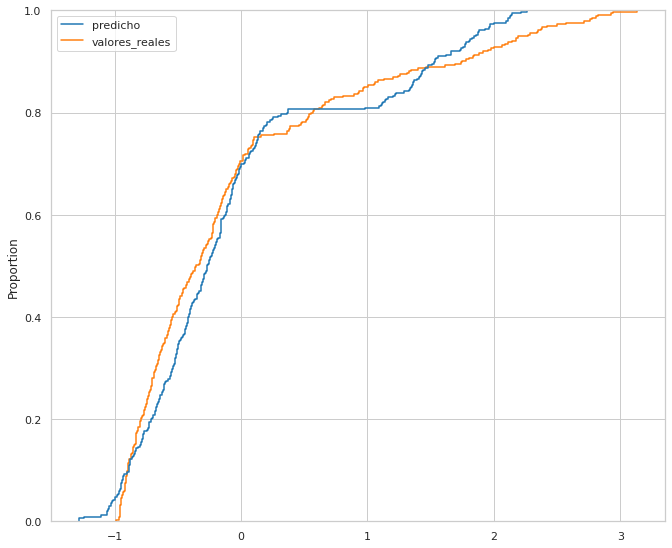

In [48]:
sns.ecdfplot(data=model_results)

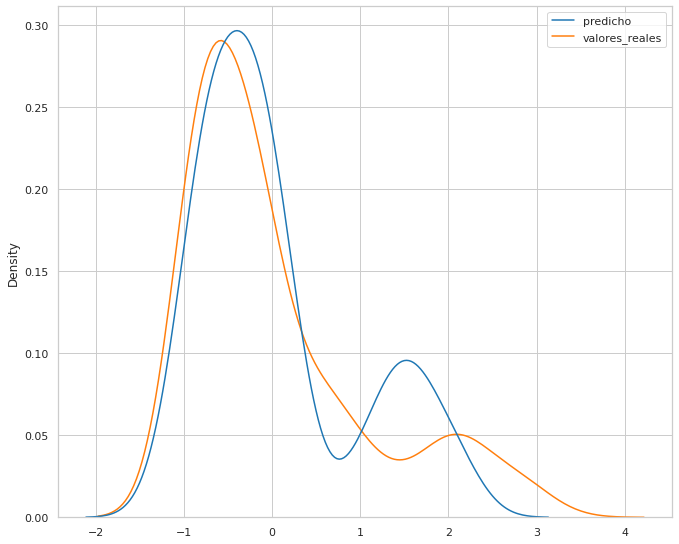

In [26]:
sns.kdeplot(data=model_results)

# Evaluamos el modelo

In [27]:
import sklearn.metrics as metrics
mse=metrics.mean_squared_error(Y_test,y_pred)
r2=metrics.r2_score(Y_test,y_pred)

print("Error cuadratico medio: ",mse)
print("El R2: ",r2)

Error cuadratico medio:  0.24998594730499743
El R2:  0.7656082815316451


Podemos ver que nuestro R2 es bueno, el MSE también y en los gráficos vemos que el modelo se acerca a los valores reales